In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [148]:
# merge all cif files into one
tm_folder = 'C:/Jobs_temp/OpenRailData/HAJ/TM'
tm_list_all = os.listdir(tm_folder)

tm_all = 'C:/Jobs_temp/OpenRailData/HAJ/TM_20220407_20220420.csv'

with open(tm_all, 'w') as outfile:
    for fname in tm_list_all:
        with open(tm_folder+'/'+fname) as infile:
            for line in infile:
                outfile.write(line)


In [149]:
tm_df = pd.read_csv(tm_all)
tm_df = tm_df[tm_df.planned_timestamp.str.isnumeric()==True]
tm_df['planned_dt'] = pd.to_datetime(tm_df['planned_timestamp'].astype(np.int64), unit='ms')
tm_df['actual_dt'] = pd.to_datetime(tm_df['actual_timestamp'].astype(np.int64), unit='ms')
#tm_df['gbtt_dt'] = pd.to_datetime(tm_df['gbtt_timestamp'].astype(np.int64), unit='ms')
tm_df['delay'] = (tm_df['actual_dt'] - tm_df['planned_dt']).astype('timedelta64[s]')

#tm_df

In [150]:
#tm_df.dtypes
tm_df['head_code'] = tm_df['train_id'].str[2:6]

In [151]:
df_all = tm_df[['toc_id','train_id','loc_stanox','direction_ind','next_report_stanox','event_type','line_ind','variation_status','planned_dt','actual_dt','delay']].copy()
#df = df[df.loc_stanox == '63018']
#df

In [152]:
df_all['loc_stanox'].value_counts()

73775    9335
73770    7152
73778    6920
73780    3696
73799    3635
73784    3456
73767    2638
73777     832
73774      15
73769      14
Name: loc_stanox, dtype: int64

In [153]:
df = df_all[df_all.loc_stanox == '73775'].copy() # AIRPORTJN

In [154]:
len(df[df.delay >= 900])

211

In [155]:
df['toc_id'].value_counts() # 25	GW:GWR, 33	XR:TFL? AGA?, 86	HX:Heathrow Express
#results for TM_analysis.xlsx

25    4317
33    2907
86    1728
00     335
54      43
34       5
Name: toc_id, dtype: int64

In [156]:
df['direction_ind'].value_counts()

DOWN    4645
UP      4625
Name: direction_ind, dtype: int64

In [157]:
df['line_ind'].value_counts()

R    3171
U    2640
M    2623
Name: line_ind, dtype: int64

In [158]:
df

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
7,86,731T35MB07,73775,DOWN,73784,DEPARTURE,M,ON TIME,2022-04-07 08:04:30,2022-04-07 08:04:00,-30.0
12,86,731Y33MB07,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-07 08:07:00,2022-04-07 08:06:00,-60.0
14,33,749P22MB07,73775,UP,73770,DEPARTURE,R,EARLY,2022-04-07 08:10:00,2022-04-07 08:07:00,-180.0
20,25,791L05M507,73775,UP,73663,DEPARTURE,U,LATE,2022-04-07 08:05:00,2022-04-07 08:08:00,180.0
24,33,739T25MB07,73775,DOWN,73784,DEPARTURE,R,EARLY,2022-04-07 08:11:00,2022-04-07 08:10:00,-60.0
...,...,...,...,...,...,...,...,...,...,...,...
44395,86,733R96M020,73775,DOWN,73822,DEPARTURE,R,LATE,2022-04-20 00:24:30,2022-04-20 00:30:00,330.0
44398,00,73653A1919,73775,DOWN,73822,DEPARTURE,R,LATE,2022-04-20 00:34:30,2022-04-20 00:37:00,150.0
44404,25,742P94M020,73775,UP,73770,DEPARTURE,R,EARLY,2022-04-20 00:54:00,2022-04-20 00:52:00,-120.0
44409,25,732R80M020,73775,DOWN,73780,DEPARTURE,R,ON TIME,2022-04-20 00:55:00,2022-04-20 00:55:00,0.0


In [159]:
export_file = tm_all.replace('.csv','_HAJ_df_export.csv')
df.to_csv(export_file)

## big Delay / Early

In [160]:
df.sort_values('delay', ascending=False)

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
26586,00,74689BCI14,73775,UP,73663,DEPARTURE,R,LATE,2022-04-14 12:14:00,2022-04-14 14:15:00,7260.0
14893,00,81484EC511,73775,UP,73663,DEPARTURE,R,LATE,2022-04-11 09:30:30,2022-04-11 11:16:00,6330.0
30365,25,791L34MY15,73775,UP,73663,DEPARTURE,U,LATE,2022-04-15 22:01:30,2022-04-15 23:14:00,4350.0
2698,25,851A92MO07,73775,UP,73663,DEPARTURE,U,LATE,2022-04-07 19:12:30,2022-04-07 20:18:00,3930.0
10875,86,733R861709,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-09 22:04:00,2022-04-09 23:09:00,3900.0
...,...,...,...,...,...,...,...,...,...,...,...
26087,00,73628A1M14,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-14 13:08:30,2022-04-14 11:36:00,-5550.0
22462,00,73601U1L13,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-13 12:52:30,2022-04-13 11:16:00,-5790.0
15282,00,74589O1N11,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-11 14:38:30,2022-04-11 12:58:00,-6030.0
3414,00,74316E1907,73775,UP,73770,DEPARTURE,R,EARLY,2022-04-08 04:08:30,2022-04-08 01:24:00,-9870.0


In [161]:
gap_filter = 300 # seconds
df_delay = df[abs(df['delay']) > gap_filter].sort_values('delay', ascending=True)
df_delay

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
3427,00,74316E1907,73775,DOWN,73822,DEPARTURE,R,EARLY,2022-04-08 05:59:30,2022-04-08 02:06:00,-14010.0
3414,00,74316E1907,73775,UP,73770,DEPARTURE,R,EARLY,2022-04-08 04:08:30,2022-04-08 01:24:00,-9870.0
15282,00,74589O1N11,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-11 14:38:30,2022-04-11 12:58:00,-6030.0
22462,00,73601U1L13,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-13 12:52:30,2022-04-13 11:16:00,-5790.0
26087,00,73628A1M14,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-14 13:08:30,2022-04-14 11:36:00,-5550.0
...,...,...,...,...,...,...,...,...,...,...,...
10875,86,733R861709,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-09 22:04:00,2022-04-09 23:09:00,3900.0
2698,25,851A92MO07,73775,UP,73663,DEPARTURE,U,LATE,2022-04-07 19:12:30,2022-04-07 20:18:00,3930.0
30365,25,791L34MY15,73775,UP,73663,DEPARTURE,U,LATE,2022-04-15 22:01:30,2022-04-15 23:14:00,4350.0
14893,00,81484EC511,73775,UP,73663,DEPARTURE,R,LATE,2022-04-11 09:30:30,2022-04-11 11:16:00,6330.0


In [162]:
#delay % with above range
len(df_delay) / len(df)

0.09566148901981789

(-600.0, 600.0)

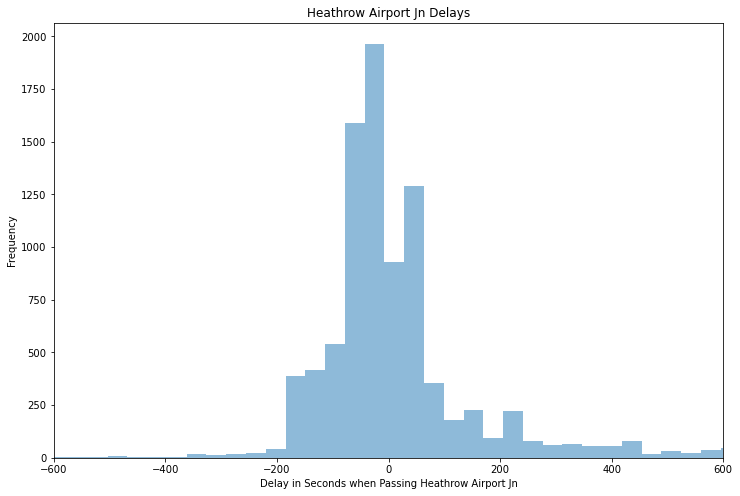

In [163]:
fig, ax = plt.subplots(1, figsize=(12,8))
df['delay'].plot.hist(ax=ax, bins=600, alpha=0.5, title='Heathrow Airport Jn Delays')
#ax.legend(['cross X'])
ax.axes.xaxis.set_visible(True)
plt.xlabel("Delay in Seconds when Passing Heathrow Airport Jn")
ax.set_xlim(-600,600)

In [164]:
# Mon '2022-04-11'
len(df[(df['actual_dt'] > '2022-04-11') & (df['actual_dt'] < '2022-04-12')])

839

In [165]:
df[(df['actual_dt'] > '2022-04-11') & (df['actual_dt'] < '2022-04-12')]

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
13505,86,731Y97M910,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-11 00:07:00,2022-04-11 00:06:00,-60.0
13509,25,731C50M910,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-11 00:02:30,2022-04-11 00:08:00,330.0
13511,33,739P51M011,73775,UP,73770,DEPARTURE,NaN,ON TIME,2022-04-11 00:11:00,2022-04-11 00:11:00,0.0
13515,25,732R93M910,73775,DOWN,73816,DEPARTURE,M,LATE,2022-04-11 00:13:30,2022-04-11 00:15:00,90.0
13518,25,735R891011,73775,DOWN,73822,DEPARTURE,M,EARLY,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0
...,...,...,...,...,...,...,...,...,...,...,...
19813,33,749P52MI11,73775,NaN,NaN,DEPARTURE,NaN,LATE,2022-04-11 11:56:00,2022-04-11 12:16:00,1200.0
19821,86,731T82MY11,73775,NaN,NaN,DEPARTURE,NaN,ON TIME,2022-04-11 19:49:30,2022-04-11 19:49:00,-30.0
19824,25,741P90M011,73775,NaN,NaN,DEPARTURE,NaN,EARLY,2022-04-11 01:24:30,2022-04-11 01:23:00,-90.0
19825,25,742P01M211,73775,NaN,NaN,DEPARTURE,NaN,LATE,2022-04-11 02:52:00,2022-04-11 03:04:00,720.0


In [166]:
df[(df['actual_dt'] > '2022-04-11') & (df['actual_dt'] < '2022-04-12')].drop_duplicates(subset=['train_id']).sort_values('actual_dt', ascending=True)

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
13505,86,731Y97M910,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-11 00:07:00,2022-04-11 00:06:00,-60.0
13509,25,731C50M910,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-11 00:02:30,2022-04-11 00:08:00,330.0
13511,33,739P51M011,73775,UP,73770,DEPARTURE,NaN,ON TIME,2022-04-11 00:11:00,2022-04-11 00:11:00,0.0
13515,25,732R93M910,73775,DOWN,73816,DEPARTURE,M,LATE,2022-04-11 00:13:30,2022-04-11 00:15:00,90.0
13518,25,735R891011,73775,DOWN,73822,DEPARTURE,M,EARLY,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0
...,...,...,...,...,...,...,...,...,...,...,...
17418,86,731T97M911,73775,DOWN,73784,DEPARTURE,M,LATE,2022-04-11 23:34:30,2022-04-11 23:54:00,1170.0
17422,33,739T47M911,73775,DOWN,73784,DEPARTURE,R,LATE,2022-04-11 23:25:00,2022-04-11 23:55:00,1800.0
17419,33,739P47M911,73775,UP,73770,DEPARTURE,U,LATE,2022-04-11 23:47:00,2022-04-11 23:56:00,540.0
17425,25,731C39N911,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-11 23:40:30,2022-04-11 23:56:00,930.0


In [167]:
df[(df['actual_dt'] > '2022-04-12') & (df['actual_dt'] < '2022-04-13')].drop_duplicates(subset=['train_id']).sort_values('actual_dt', ascending=True)

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay
17437,25,731C50M911,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-11 23:57:30,2022-04-12 00:02:00,270.0
17444,25,732R78M911,73775,DOWN,73780,DEPARTURE,M,LATE,2022-04-12 00:09:30,2022-04-12 00:10:00,30.0
19341,33,739Z493911,73775,NaN,NaN,DEPARTURE,NaN,LATE,2022-04-12 00:10:00,2022-04-12 00:11:00,60.0
17452,00,73509P1911,73775,DOWN,73784,DEPARTURE,R,LATE,2022-04-11 23:48:30,2022-04-12 00:12:00,1410.0
19828,33,749P44M811,73775,NaN,NaN,DEPARTURE,NaN,LATE,2022-04-11 23:27:30,2022-04-12 00:13:00,2730.0
...,...,...,...,...,...,...,...,...,...,...,...
21426,33,739N122912,73775,DOWN,73780,DEPARTURE,M,LATE,2022-04-12 23:40:00,2022-04-12 23:43:00,180.0
21437,86,731Y96M912,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-12 23:52:00,2022-04-12 23:51:00,-60.0
21442,25,851A39MV12,73775,UP,73663,DEPARTURE,U,LATE,2022-04-12 23:39:30,2022-04-12 23:52:00,750.0
21445,25,731D96M912,73775,DOWN,73822,DEPARTURE,M,LATE,2022-04-12 23:47:30,2022-04-12 23:55:00,450.0


<AxesSubplot:xlabel='actual_dt'>

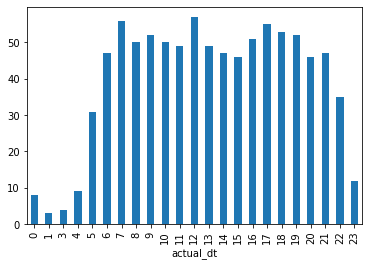

In [168]:
dfmon = tm_df[(tm_df['actual_dt'] > '2022-04-11') & (tm_df['actual_dt'] < '2022-04-12')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dfmon.actual_dt)
dfmon['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

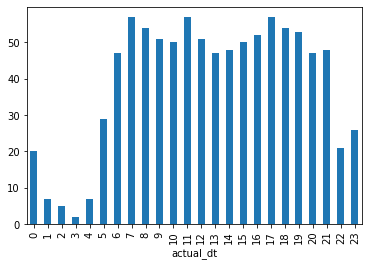

In [169]:
dftue = tm_df[(tm_df['actual_dt'] > '2022-04-12') & (tm_df['actual_dt'] < '2022-04-13')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dftue.actual_dt)
dftue['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

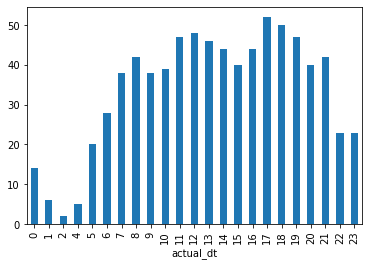

In [170]:
dfwed = tm_df[(tm_df['actual_dt'] > '2022-04-13') & (tm_df['actual_dt'] < '2022-04-14')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dfwed.actual_dt)
dfwed['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

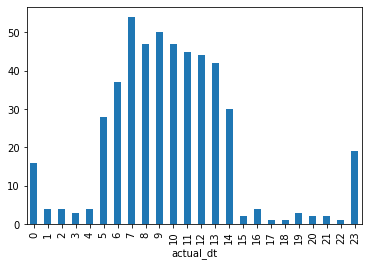

In [171]:
dfthu = tm_df[(tm_df['actual_dt'] > '2022-04-14') & (tm_df['actual_dt'] < '2022-04-15')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dfthu.actual_dt)
dfthu['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

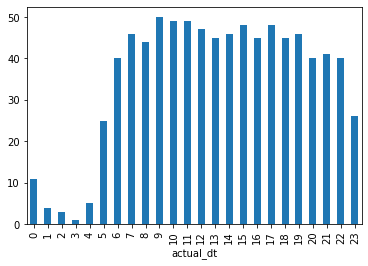

In [172]:
dffri = tm_df[(tm_df['actual_dt'] > '2022-04-15') & (tm_df['actual_dt'] < '2022-04-16')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dffri.actual_dt)
dffri['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

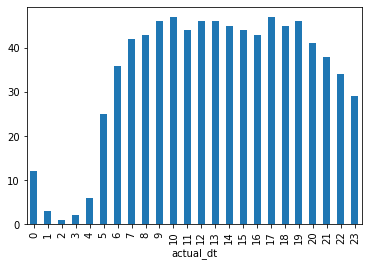

In [173]:
dfsat = tm_df[(tm_df['actual_dt'] > '2022-04-16') & (tm_df['actual_dt'] < '2022-04-17')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dfsat.actual_dt)
dfsat['train_id'].groupby([times.hour]).count().plot.bar()

<AxesSubplot:xlabel='actual_dt'>

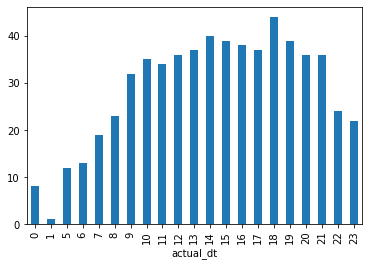

In [174]:
dfsun = tm_df[(tm_df['actual_dt'] > '2022-04-17') & (tm_df['actual_dt'] < '2022-04-18')].drop_duplicates(subset=['train_id'])
times = pd.DatetimeIndex(dfsun.actual_dt)
dfsun['train_id'].groupby([times.hour]).count().plot.bar()

In [175]:
print(len(dfmon),len(dftue),len(dfwed),len(dfthu),len(dffri),len(dfsat),len(dfsun))

909 940 778 490 844 811 605


In [176]:
dfmon['head_code'] = dfmon['train_id'].str[2:6]
dfmon.sort_values('actual_dt', ascending=True)

,event_type,gbtt_timestamp,original_loc_stanox,planned_timestamp,timetable_variation,original_loc_timestamp,current_train_id,delay_monitoring_point,next_report_run_time,reporting_stanox,...,auto_expected,direction_ind,route,planned_event_type,next_report_stanox,line_ind,planned_dt,actual_dt,delay,head_code
13501,DEPARTURE,1649635260000,NaN,1649635260000,0,NaN,NaN,true,4,73767,...,true,UP,1,DEPARTURE,73778,NaN,2022-04-11 00:01:00,2022-04-11 00:01:00,0.0,9P51
13502,DEPARTURE,1649635380000,NaN,1649635380000,1,NaN,NaN,true,3,73778,...,true,UP,1,DEPARTURE,73784,NaN,2022-04-11 00:03:00,2022-04-11 00:02:00,-60.0,1Y97
13509,DEPARTURE,NaN,NaN,1649635350000,6,NaN,NaN,true,10,73775,...,true,DOWN,1,DEPARTURE,73822,M,2022-04-11 00:02:30,2022-04-11 00:08:00,330.0,1C50
13512,ARRIVAL,1649635920000,NaN,1649635920000,2,NaN,NaN,true,1,73770,...,true,DOWN,0,ARRIVAL,73775,NaN,2022-04-11 00:12:00,2022-04-11 00:14:00,120.0,2R93
13518,DEPARTURE,NaN,NaN,1649636940000,12,NaN,NaN,true,6,73775,...,true,DOWN,1,DEPARTURE,73822,M,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0,5R89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17399,ARRIVAL,NaN,NaN,1649717970000,49,NaN,NaN,false,1,00000,...,true,NaN,0,ARRIVAL,73775,NaN,2022-04-11 22:59:30,2022-04-11 23:48:00,2910.0,1L36
17415,ARRIVAL,1649719380000,NaN,1649719380000,30,NaN,NaN,true,1,73770,...,true,DOWN,0,ARRIVAL,73775,NaN,2022-04-11 23:23:00,2022-04-11 23:53:00,1800.0,9T47
17418,DEPARTURE,NaN,NaN,1649720070000,20,NaN,NaN,true,2,73775,...,true,DOWN,3,DEPARTURE,73784,M,2022-04-11 23:34:30,2022-04-11 23:54:00,1170.0,1T97
17425,DEPARTURE,NaN,NaN,1649720430000,16,NaN,NaN,true,6,73775,...,true,DOWN,1,DEPARTURE,73822,M,2022-04-11 23:40:30,2022-04-11 23:56:00,930.0,1C39


In [177]:
df['next_report_stanox'].value_counts() # 

73663    2841
73822    1949
73770    1765
73784    1722
73780     901
73819      38
73799      30
73667      16
73814       6
73250       5
73816       4
73810       1
Name: next_report_stanox, dtype: int64

In [178]:
def get_direction(row):
    if row['loc_stanox'] == '73775':
        if row['next_report_stanox'] in ['73784']:
            return 'DA'
        elif row['next_report_stanox'] in ['73780','73799','73819','73814']:
            return 'DM'
        elif row['next_report_stanox'] in ['73663','73770','73667']:
            return 'U'
        else:
            return 'null'
    else:
        return 'null'

In [179]:
tm_df['direction'] = tm_df.apply(lambda row: get_direction(row), axis=1)

tm_df[tm_df.direction != 'null']
tm_df

,event_type,gbtt_timestamp,original_loc_stanox,planned_timestamp,timetable_variation,original_loc_timestamp,current_train_id,delay_monitoring_point,next_report_run_time,reporting_stanox,...,direction_ind,route,planned_event_type,next_report_stanox,line_ind,planned_dt,actual_dt,delay,head_code,direction
0,DEPARTURE,1649318520000,NaN,1649318520000,0,NaN,NaN,true,4,73778,...,DOWN,2,DEPARTURE,73777,NaN,2022-04-07 08:02:00,2022-04-07 08:02:00,0.0,5H23,null
1,ARRIVAL,1649318700000,NaN,1649318790000,2,NaN,NaN,false,3,00000,...,DOWN,0,ARRIVAL,73810,D,2022-04-07 08:06:30,2022-04-07 08:04:00,-150.0,9R24,null
2,ARRIVAL,1649318760000,NaN,1649318790000,2,NaN,NaN,false,3,00000,...,UP,0,ARRIVAL,73775,U,2022-04-07 08:06:30,2022-04-07 08:04:00,-150.0,9P22,null
5,DEPARTURE,1649318640000,NaN,1649318700000,2,NaN,NaN,true,3,73770,...,UP,2,DEPARTURE,73663,NaN,2022-04-07 08:05:00,2022-04-07 08:03:00,-120.0,9P21,null
6,DEPARTURE,NaN,NaN,1649318730000,0,NaN,NaN,true,1,73784,...,UP,1,DEPARTURE,73799,U,2022-04-07 08:05:30,2022-04-07 08:05:00,-30.0,1Y33,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,DEPARTURE,1650416100000,NaN,1650416130000,1,NaN,NaN,true,3,73770,...,UP,2,DEPARTURE,73663,NaN,2022-04-20 00:55:30,2022-04-20 00:54:00,-90.0,2P94,null
44408,DEPARTURE,1650416040000,NaN,1650416070000,0,NaN,NaN,true,1,73770,...,DOWN,1,DEPARTURE,73775,R,2022-04-20 00:54:30,2022-04-20 00:54:00,-30.0,2R80,null
44409,DEPARTURE,NaN,NaN,1650416100000,0,NaN,NaN,true,3,73775,...,DOWN,1,DEPARTURE,73780,R,2022-04-20 00:55:00,2022-04-20 00:55:00,0.0,2R80,DM
44410,ARRIVAL,1650416280000,NaN,1650416280000,0,NaN,NaN,false,3,00000,...,DOWN,0,ARRIVAL,73810,D,2022-04-20 00:58:00,2022-04-20 00:58:00,0.0,2R80,null


In [180]:
df['direction']    = df.apply(lambda row: get_direction(row), axis=1)
dfmon['direction'] = dfmon.apply(lambda row: get_direction(row), axis=1)
dfmon

,event_type,gbtt_timestamp,original_loc_stanox,planned_timestamp,timetable_variation,original_loc_timestamp,current_train_id,delay_monitoring_point,next_report_run_time,reporting_stanox,...,direction_ind,route,planned_event_type,next_report_stanox,line_ind,planned_dt,actual_dt,delay,head_code,direction
13501,DEPARTURE,1649635260000,NaN,1649635260000,0,NaN,NaN,true,4,73767,...,UP,1,DEPARTURE,73778,NaN,2022-04-11 00:01:00,2022-04-11 00:01:00,0.0,9P51,null
13502,DEPARTURE,1649635380000,NaN,1649635380000,1,NaN,NaN,true,3,73778,...,UP,1,DEPARTURE,73784,NaN,2022-04-11 00:03:00,2022-04-11 00:02:00,-60.0,1Y97,null
13509,DEPARTURE,NaN,NaN,1649635350000,6,NaN,NaN,true,10,73775,...,DOWN,1,DEPARTURE,73822,M,2022-04-11 00:02:30,2022-04-11 00:08:00,330.0,1C50,null
13512,ARRIVAL,1649635920000,NaN,1649635920000,2,NaN,NaN,true,1,73770,...,DOWN,0,ARRIVAL,73775,NaN,2022-04-11 00:12:00,2022-04-11 00:14:00,120.0,2R93,null
13518,DEPARTURE,NaN,NaN,1649636940000,12,NaN,NaN,true,6,73775,...,DOWN,1,DEPARTURE,73822,M,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0,5R89,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17418,DEPARTURE,NaN,NaN,1649720070000,20,NaN,NaN,true,2,73775,...,DOWN,3,DEPARTURE,73784,M,2022-04-11 23:34:30,2022-04-11 23:54:00,1170.0,1T97,DA
17425,DEPARTURE,NaN,NaN,1649720430000,16,NaN,NaN,true,6,73775,...,DOWN,1,DEPARTURE,73822,M,2022-04-11 23:40:30,2022-04-11 23:56:00,930.0,1C39,null
17430,DEPARTURE,NaN,NaN,1649720850000,11,NaN,NaN,true,9,73775,...,DOWN,1,DEPARTURE,73822,M,2022-04-11 23:47:30,2022-04-11 23:58:00,630.0,1D96,null
18392,DEPARTURE,NaN,NaN,1649716830000,0,NaN,NaN,true,NaN,73775,...,NaN,NaN,DEPARTURE,NaN,NaN,2022-04-11 22:40:30,2022-04-11 22:40:00,-30.0,1C37,null


In [181]:
dfmon.sort_values('planned_dt')[['head_code','planned_dt','actual_dt','delay','line_ind','direction']]

,head_code,planned_dt,actual_dt,delay,line_ind,direction
13501,9P51,2022-04-11 00:01:00,2022-04-11 00:01:00,0.0,NaN,null
13509,1C50,2022-04-11 00:02:30,2022-04-11 00:08:00,330.0,M,null
13502,1Y97,2022-04-11 00:03:00,2022-04-11 00:02:00,-60.0,NaN,null
13512,2R93,2022-04-11 00:12:00,2022-04-11 00:14:00,120.0,NaN,null
13521,3R95,2022-04-11 00:16:30,2022-04-11 00:28:00,690.0,M,null
...,...,...,...,...,...,...
17389,1Y95,2022-04-11 23:27:00,2022-04-11 23:43:00,960.0,NaN,null
17418,1T97,2022-04-11 23:34:30,2022-04-11 23:54:00,1170.0,M,DA
17394,9P47,2022-04-11 23:37:00,2022-04-11 23:45:00,480.0,NaN,null
17425,1C39,2022-04-11 23:40:30,2022-04-11 23:56:00,930.0,M,null


In [182]:
df_day = dfmon.sort_values('planned_dt')[['head_code','planned_dt','actual_dt','delay','line_ind','direction']].copy()
df_day['planned_gap'] = df_day['planned_dt'].diff()
df_day['pre_head_code'] = df_day['head_code'].shift(1)
df_day['pre_planned_dt'] = df_day['planned_dt'].shift(1)
df_day['pre_actual_dt'] = df_day['actual_dt'].shift(1)
df_day['pre_line_ind'] = df_day['line_ind'].shift(1)
df_day['pre_direction'] = df_day['direction'].shift(1)
df_day[df_day['planned_gap']<'0 days 00:00:30']
df_day.dropna(subset=['line_ind', 'pre_line_ind']).head(30)

,head_code,planned_dt,actual_dt,delay,line_ind,direction,planned_gap,pre_head_code,pre_planned_dt,pre_actual_dt,pre_line_ind,pre_direction
13518,5R89,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0,M,null,0 days 00:12:30,3R95,2022-04-11 00:16:30,2022-04-11 00:28:00,M,null
13581,3K80,2022-04-11 04:20:30,2022-04-11 04:17:00,-210.0,M,null,0 days 00:19:30,3P08,2022-04-11 04:01:00,2022-04-11 04:01:00,M,null
13582,2P07,2022-04-11 04:23:30,2022-04-11 04:24:00,30.0,U,null,0 days 00:03:00,3K80,2022-04-11 04:20:30,2022-04-11 04:17:00,M,null
13588,668C,2022-04-11 04:27:00,2022-04-11 04:26:00,-60.0,M,null,0 days 00:03:30,2P07,2022-04-11 04:23:30,2022-04-11 04:24:00,U,null
13616,5E21,2022-04-11 05:05:30,2022-04-11 05:05:00,-30.0,M,DA,0 days 00:02:30,608E,2022-04-11 05:03:00,2022-04-11 04:56:00,U,null
13617,2P11,2022-04-11 05:07:00,2022-04-11 05:08:00,60.0,U,null,0 days 00:01:30,5E21,2022-04-11 05:05:30,2022-04-11 05:05:00,M,DA
13632,5H01,2022-04-11 05:11:30,2022-04-11 05:13:00,90.0,R,DA,0 days 00:04:30,2P11,2022-04-11 05:07:00,2022-04-11 05:08:00,U,null
13647,1T24,2022-04-11 05:21:00,2022-04-11 05:19:00,-120.0,M,DA,0 days 00:02:00,682C,2022-04-11 05:19:00,2022-04-11 05:07:00,R,DM
13671,1C00,2022-04-11 05:31:30,2022-04-11 05:31:00,-30.0,M,null,0 days 00:03:00,3D13,2022-04-11 05:28:30,2022-04-11 05:37:00,M,null
13676,9P02,2022-04-11 05:35:30,2022-04-11 05:34:00,-90.0,U,null,0 days 00:00:30,1T25,2022-04-11 05:35:00,2022-04-11 05:35:00,M,DA


In [183]:
df_day[(df_day['direction'] == 'DA') & ((df_day['pre_line_ind'] == 'M') | (df_day['pre_line_ind'] == 'R'))]

,head_code,planned_dt,actual_dt,delay,line_ind,direction,planned_gap,pre_head_code,pre_planned_dt,pre_actual_dt,pre_line_ind,pre_direction
13647,1T24,2022-04-11 05:21:00,2022-04-11 05:19:00,-120.0,M,DA,0 days 00:02:00,682C,2022-04-11 05:19:00,2022-04-11 05:07:00,R,DM
13868,1T29,2022-04-11 06:34:30,2022-04-11 06:35:00,30.0,M,DA,0 days 00:00:00,6V48,2022-04-11 06:34:30,2022-04-11 06:33:00,R,DM
15775,1T64,2022-04-11 15:19:30,2022-04-11 15:19:00,-30.0,M,DA,0 days 00:03:30,1K18,2022-04-11 15:16:00,2022-04-11 15:15:00,M,null
16897,1T84,2022-04-11 20:20:00,2022-04-11 20:19:00,-60.0,M,DA,0 days 00:03:30,1K28,2022-04-11 20:16:30,2022-04-11 20:17:00,M,null
17087,1T88,2022-04-11 21:19:30,2022-04-11 21:19:00,-30.0,M,DA,0 days 00:00:00,414G,2022-04-11 21:19:30,2022-04-11 21:20:00,R,U
17189,1T90,2022-04-11 21:49:30,2022-04-11 21:50:00,30.0,M,DA,0 days 00:05:30,1R17,2022-04-11 21:44:00,2022-04-11 21:43:00,M,null
17237,1T91,2022-04-11 22:04:30,2022-04-11 22:06:00,90.0,M,DA,0 days 00:00:30,4Z84,2022-04-11 22:04:00,2022-04-11 22:07:00,R,U
17367,506P,2022-04-11 22:59:30,2022-04-11 22:56:00,-210.0,R,DA,0 days 00:03:00,1B38,2022-04-11 22:56:30,2022-04-11 22:57:00,M,null


In [184]:
df_day = df_day.sort_values('actual_dt')
df_day['actual_gap'] = df_day['actual_dt'].diff()
df_day[df_day['actual_gap']<'0 days 00:00:30'].dropna(subset=['line_ind', 'pre_line_ind'])#.head(30)

,head_code,planned_dt,actual_dt,delay,line_ind,direction,planned_gap,pre_head_code,pre_planned_dt,pre_actual_dt,pre_line_ind,pre_direction,actual_gap
13772,1T27,2022-04-11 06:05:30,2022-04-11 06:04:00,-90.0,M,DA,0 days 00:00:00,9P06,2022-04-11 06:05:30,2022-04-11 06:04:00,U,null,0 days
13862,9P10,2022-04-11 06:36:30,2022-04-11 06:35:00,-90.0,U,null,0 days 00:02:00,1T29,2022-04-11 06:34:30,2022-04-11 06:35:00,M,DA,0 days
14311,9P26,2022-04-11 08:36:30,2022-04-11 08:35:00,-90.0,U,null,0 days 00:02:00,1T37,2022-04-11 08:34:30,2022-04-11 08:34:00,M,DA,0 days
14432,9P30,2022-04-11 09:06:30,2022-04-11 09:07:00,30.0,U,null,0 days 00:02:00,1T39,2022-04-11 09:04:30,2022-04-11 09:04:00,M,DA,0 days
14545,1T41,2022-04-11 09:35:30,2022-04-11 09:35:00,-30.0,M,DA,0 days 00:00:30,9P34,2022-04-11 09:35:00,2022-04-11 09:36:00,U,null,0 days
14893,484E,2022-04-11 09:30:30,2022-04-11 11:16:00,6330.0,R,U,0 days 00:02:00,1D18,2022-04-11 09:28:30,2022-04-11 09:30:00,M,null,0 days
14927,565O,2022-04-11 11:31:00,2022-04-11 11:26:00,-300.0,R,null,0 days 00:00:30,0Z27,2022-04-11 11:30:30,2022-04-11 11:43:00,R,U,0 days
15069,1T51,2022-04-11 12:04:30,2022-04-11 12:07:00,150.0,M,DA,0 days 00:01:00,2P42,2022-04-11 12:03:30,2022-04-11 12:17:00,U,null,0 days
15084,762D,2022-04-11 11:20:30,2022-04-11 12:12:00,3090.0,R,U,0 days 00:01:00,1T48,2022-04-11 11:19:30,2022-04-11 11:20:00,M,DA,0 days
15466,9P68,2022-04-11 13:51:30,2022-04-11 13:51:00,-30.0,U,null,0 days 00:02:00,1T58,2022-04-11 13:49:30,2022-04-11 13:49:00,M,DA,0 days


In [185]:
df_day.dropna(subset=['line_ind', 'pre_line_ind'])

,head_code,planned_dt,actual_dt,delay,line_ind,direction,planned_gap,pre_head_code,pre_planned_dt,pre_actual_dt,pre_line_ind,pre_direction,actual_gap
13518,5R89,2022-04-11 00:29:00,2022-04-11 00:17:00,-720.0,M,null,0 days 00:12:30,3R95,2022-04-11 00:16:30,2022-04-11 00:28:00,M,null,0 days 00:03:00
13581,3K80,2022-04-11 04:20:30,2022-04-11 04:17:00,-210.0,M,null,0 days 00:19:30,3P08,2022-04-11 04:01:00,2022-04-11 04:01:00,M,null,0 days 00:16:00
13582,2P07,2022-04-11 04:23:30,2022-04-11 04:24:00,30.0,U,null,0 days 00:03:00,3K80,2022-04-11 04:20:30,2022-04-11 04:17:00,M,null,0 days 00:07:00
13588,668C,2022-04-11 04:27:00,2022-04-11 04:26:00,-60.0,M,null,0 days 00:03:30,2P07,2022-04-11 04:23:30,2022-04-11 04:24:00,U,null,0 days 00:02:00
13616,5E21,2022-04-11 05:05:30,2022-04-11 05:05:00,-30.0,M,DA,0 days 00:02:30,608E,2022-04-11 05:03:00,2022-04-11 04:56:00,U,null,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17237,1T91,2022-04-11 22:04:30,2022-04-11 22:06:00,90.0,M,DA,0 days 00:00:30,4Z84,2022-04-11 22:04:00,2022-04-11 22:07:00,R,U,0 days 00:03:00
17236,2P84,2022-04-11 22:06:30,2022-04-11 22:07:00,30.0,U,null,0 days 00:02:00,1T91,2022-04-11 22:04:30,2022-04-11 22:06:00,M,DA,0 days 00:00:00
17357,5R90,2022-04-11 22:51:00,2022-04-11 22:51:00,0.0,M,null,0 days 00:01:30,1T94,2022-04-11 22:49:30,2022-04-11 22:49:00,M,DA,0 days 00:02:00
17367,506P,2022-04-11 22:59:30,2022-04-11 22:56:00,-210.0,R,DA,0 days 00:03:00,1B38,2022-04-11 22:56:30,2022-04-11 22:57:00,M,null,0 days 00:05:00


In [186]:
#work out the disorder

from datetime import date, timedelta
delta = timedelta(days=1)

start_date = date(2021, 7, 1)
end_date = date(2021, 8, 18)

daterange = pd.date_range(start_date, end_date)

In [187]:
df_disorder = df.sort_values('planned_dt').copy()
df_disorder['disorder'] = round(df_disorder['actual_dt'].diff().dt.total_seconds()/60, 1) # minuts
df_disorder['pre_toc'] = df_disorder['toc_id'].shift(1)
df_disorder['pre_planned'] = df_disorder['planned_dt'].shift(1)
df_disorder['pre_actual'] = df_disorder['actual_dt'].shift(1)
df_disorder = df_disorder[df_disorder.disorder<0]
df_disorder

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay,direction,disorder,pre_toc,pre_planned,pre_actual
12,86,731Y33MB07,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-07 08:07:00,2022-04-07 08:06:00,-60.0,U,-2.0,25,2022-04-07 08:05:00,2022-04-07 08:08:00
24,33,739T25MB07,73775,DOWN,73784,DEPARTURE,R,EARLY,2022-04-07 08:11:00,2022-04-07 08:10:00,-60.0,DA,-3.0,25,2022-04-07 08:10:30,2022-04-07 08:13:00
41,25,732N14MB07,73775,DOWN,73780,DEPARTURE,R,ON TIME,2022-04-07 08:14:00,2022-04-07 08:14:00,0.0,DM,-15.0,25,2022-04-07 08:13:30,2022-04-07 08:29:00
46,25,811A06M607,73775,UP,73663,DEPARTURE,U,EARLY,2022-04-07 08:19:00,2022-04-07 08:15:00,-240.0,U,-2.0,33,2022-04-07 08:17:30,2022-04-07 08:17:00
86,25,741P15MB07,73775,UP,73663,DEPARTURE,U,EARLY,2022-04-07 08:28:00,2022-04-07 08:27:00,-60.0,U,-1.0,33,2022-04-07 08:27:00,2022-04-07 08:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44070,00,73653A1919,73775,UP,73663,DEPARTURE,R,EARLY,2022-04-19 23:07:00,2022-04-19 22:20:00,-2820.0,U,-46.0,86,2022-04-19 23:06:30,2022-04-19 23:06:00
44301,86,731Y95M919,73775,UP,73663,DEPARTURE,NaN,ON TIME,2022-04-19 23:36:30,2022-04-19 23:36:00,-30.0,U,-1.0,86,2022-04-19 23:34:30,2022-04-19 23:37:00
44327,25,731D96M919,73775,DOWN,73822,DEPARTURE,R,EARLY,2022-04-19 23:47:30,2022-04-19 23:45:00,-150.0,null,-2.0,33,2022-04-19 23:47:00,2022-04-19 23:47:00
44374,25,732R78M919,73775,DOWN,73780,DEPARTURE,R,ON TIME,2022-04-20 00:09:30,2022-04-20 00:09:00,-30.0,DM,-1.0,25,2022-04-20 00:09:30,2022-04-20 00:10:00


In [188]:
export_file = tm_all.replace('.csv','_HAJ_df_export_disorder.csv')
df_disorder.to_csv(export_file)

In [201]:
# work out UP direction
# UA merge into UM/UR

dfu = df_all[df_all.direction_ind == 'UP'].copy()
dfu['next_toc'] = dfu['toc_id'].shift(-1)
dfu['next_train'] = dfu['train_id'].shift(-1)
dfu['next_loc'] = dfu['loc_stanox'].shift(-1)
dfu['next_line'] = dfu['line_ind'].shift(-1)
#dfu = dfu[dfu.next_loc == '73775'].copy() # next is AIRPORTJN
dfu

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay,next_toc,next_train,next_loc,next_line
2,33,749P22MB07,73780,UP,73775,ARRIVAL,U,EARLY,2022-04-07 08:06:30,2022-04-07 08:04:00,-150.0,33,739P21MB07,73770,NaN
5,33,739P21MB07,73770,UP,73663,DEPARTURE,NaN,EARLY,2022-04-07 08:05:00,2022-04-07 08:03:00,-120.0,86,731Y33MB07,73784,U
6,86,731Y33MB07,73784,UP,73799,DEPARTURE,U,ON TIME,2022-04-07 08:05:30,2022-04-07 08:05:00,-30.0,33,749P22MB07,73780,U
10,33,749P22MB07,73780,UP,73775,DEPARTURE,U,EARLY,2022-04-07 08:07:30,2022-04-07 08:05:00,-150.0,86,731Y33MB07,73775,NaN
12,86,731Y33MB07,73775,UP,73663,DEPARTURE,NaN,EARLY,2022-04-07 08:07:00,2022-04-07 08:06:00,-60.0,33,739P23MC07,73767,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44399,25,742P94M020,73780,UP,73775,ARRIVAL,U,ON TIME,2022-04-20 00:50:30,2022-04-20 00:50:00,-30.0,25,742P94M020,73780,U
44400,25,742P94M020,73780,UP,73775,DEPARTURE,U,EARLY,2022-04-20 00:51:30,2022-04-20 00:50:00,-90.0,25,742P94M020,73775,R
44404,25,742P94M020,73775,UP,73770,DEPARTURE,R,EARLY,2022-04-20 00:54:00,2022-04-20 00:52:00,-120.0,25,742P94M020,73770,NaN
44405,25,742P94M020,73770,UP,73663,ARRIVAL,NaN,EARLY,2022-04-20 00:54:30,2022-04-20 00:53:00,-90.0,25,742P94M020,73770,NaN


In [202]:
dfu[(dfu.next_loc == '73775')&(dfu.train_id == dfu.next_train)]

,toc_id,train_id,loc_stanox,direction_ind,next_report_stanox,event_type,line_ind,variation_status,planned_dt,actual_dt,delay,next_toc,next_train,next_loc,next_line
18,25,791L05M507,73799,UP,73775,DEPARTURE,M,LATE,2022-04-07 08:04:30,2022-04-07 08:08:00,210.0,25,791L05M507,73775,U
47,33,739P23MC07,73784,UP,73799,DEPARTURE,U,EARLY,2022-04-07 08:16:00,2022-04-07 08:15:00,-60.0,33,739P23MC07,73775,U
64,86,731Y34MC07,73784,UP,73799,DEPARTURE,U,ON TIME,2022-04-07 08:20:30,2022-04-07 08:20:00,-30.0,86,731Y34MC07,73775,NaN
72,25,841A70M407,73799,UP,73775,DEPARTURE,M,ON TIME,2022-04-07 08:23:30,2022-04-07 08:23:00,-30.0,25,841A70M407,73775,U
132,25,741P81MB07,73799,UP,73775,DEPARTURE,M,ON TIME,2022-04-07 08:39:00,2022-04-07 08:39:00,0.0,25,741P81MB07,73775,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44221,86,731Y93M819,73784,UP,73799,DEPARTURE,U,ON TIME,2022-04-19 23:05:30,2022-04-19 23:05:00,-30.0,86,731Y93M819,73775,NaN
44329,33,739P47M919,73784,UP,73799,DEPARTURE,U,EARLY,2022-04-19 23:46:00,2022-04-19 23:45:00,-60.0,33,739P47M919,73775,U
44341,86,731Y96M919,73784,UP,73799,DEPARTURE,U,ON TIME,2022-04-19 23:50:30,2022-04-19 23:50:00,-30.0,86,731Y96M919,73775,NaN
44389,00,73586T1020,73784,UP,73799,DEPARTURE,U,LATE,2022-04-20 00:18:30,2022-04-20 00:20:00,90.0,00,73586T1020,73775,U


In [203]:
dfu['toc_id'].value_counts() # 25	GW:GWR, 33	XR:TFL? AGA?, 86	HX:Heathrow Express

33    8440
25    5323
86    4274
00     235
54      31
34       3
Name: toc_id, dtype: int64

In [204]:
dfu['loc_stanox'].value_counts()

73775    4625
73778    3441
73770    3152
73780    1847
73799    1788
73784    1726
73767    1316
73777     411
Name: loc_stanox, dtype: int64

In [205]:
export_file = tm_all.replace('.csv','_HAJ_df_export_up.csv')
dfu.to_csv(export_file)